# Práctica 1

Autor: Btanca Cano Camarero  DGIIM  
Grupo: 2  
Fecha: Octubre 2021  


In [41]:
# Configuración previa 
# modulos utilizados
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

# ____ Display test ___
TESTS_ON = True

# ___ Lectura de imágenes___
# path carpeta con imágenes
path = 'imagenes/'

# Reutilizamos código de la práctica inicial
def ReadImage(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv.imread(filename, flagColor)
## Flags
flagColor = cv.IMREAD_ANYCOLOR
flagGrey = cv.IMREAD_GRAYSCALE

# Path de las imágenes
path_bicycle = path + 'bicycle.bmp'
path_bird = path + 'bird.bmp'
path_cat = path + 'cat.bmp'

# Leemos las imágenes
img_bicycle = ReadImage(path_bicycle, flagColor)
img_bicycle_grey = ReadImage(path_bicycle, flagGrey)
img_bird = ReadImage(path_bird, flagColor)
img_bird_grey = ReadImage(path_bird, flagGrey)
img_cat = ReadImage(path_cat, flagColor)
img_cat_grey = ReadImage(path_cat, flagGrey)


# Devuelve si una imagen está en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen está en blanco y negro'''
    return len(img.shape) == 2

# Para pintar imágenes
def Normalize (img):
    ''' Transforma una imagen de números reales
    al intervalo [0,1] 
    '''
    min = np.min(img)
    max = np.max(img)

    normalized_img = np.copy(img)

    if max - min > 0:
        normalized_img = (normalized_img - min) / (max - min)
    else: 
        normalized_img *= 0 # suponemos todo blanca
    return normalized_img

def PrintOneImage( img, title=None, normalize= True):
    '''Muestra una imagen usando imshow
    '''
    if normalize:
        img = Normalize(img)
    if IsGreyScale(img):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[:,:,::-1])
    if title:
        plt.title(title)
    plt.show()



''' utilizar la convolución 
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
'''
def Convolution1D(f, g): 
    ''' 
    Esta función calcula la convolución de g con f 
    f array 
        g kernel de convolución
    '''
    mask_length = len(g)
    g_inv = g[::-1]
    bound_array = np.zeros(len(g) -1)
    expanded_f = np.concatenate( (bound_array, f, bound_array)) 
    convoluted_f = np.zeros( len(expanded_f)- mask_length +1) 

    for i in range( len(expanded_f) - mask_length +1):
        convoluted_f[i] = sum([ expanded_f[i+j]*m for j,m in enumerate(g_inv) ])

    return convoluted_f


def RangoK (k: int):
    ''' dato k >= 0 devuelve [-k, -k+1, ...k-1, k]'''
    return list(range(-k, k+1))
def SacaRangoMascara(m):
    ''' Dada una máscata m, deduce su rango centrado
        Función auxiliar para representar máscaras
    '''
    return RangoK( (len(m)-1) // 2)
# Función para mostrar una máscara 
def MuestreaMascara( mascara:list, title = None,color= '--o'):
    dominio = RangoK((len(mascara)-1)//2)
    plt.plot(dominio, mascara, color)
    if (title):
        plt.title( title)
    plt.show()

# Función para comparar máscaras usando la norma euclídea
def DistanciaEuclidea (m1:np.array, m2:np.array)->float: 
    return np.linalg.norm(m1-m2)

# Función para mostrar dos máscaras 
### Comparamos las máscaras   
def MuestraDosMascaras ( m1, m2, title= None, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if(title):
        fig.suptitle(title)
    # calculamos máscara 1
    r1 = SacaRangoMascara(m1)
    ax1.plot(r1, m1, '--o')
    if(title1):
        ax1.set_title( title1)
    # calculamos máscara 2
    r2 = SacaRangoMascara(m2)
    ax2.plot(r2, m2, '--x')
    if(title2):
        ax2.set_title( title2)
    fig.tight_layout()
    plt.show()


[1]
[1. 2. 3.]
[ 1.  4. 10. 12.  9.]
[ 1.  6. 21. 44. 63. 54. 27.]
[  1.   8.  36. 104. 214. 312. 324. 216.  81.]
Pascal Triangle
[1]
[1. 1.]
[1. 2. 1.]
[1. 3. 3. 1.]
[1. 4. 6. 4. 1.]


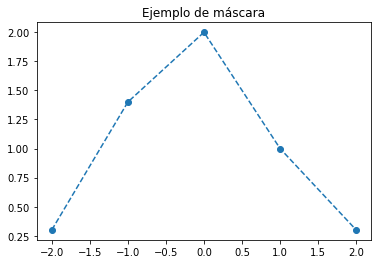

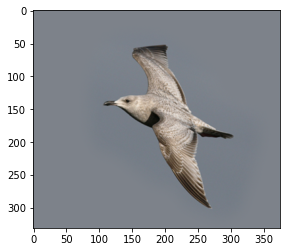

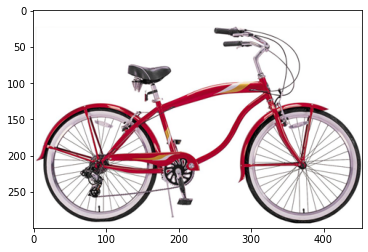

In [14]:
# Test cell 

# Test if convoluted function is correct

if TESTS_ON:
    initial_array = [1]
    mask = [1,2,3]
    n = 4
    print(initial_array)
    for i in range(n):
        initial_array = Convolution1D(initial_array, mask)
        print(initial_array)

    print('Pascal Triangle')
    initial_array = [1]
    mask = [1,1]
    n = 4
    print(initial_array)
    for i in range(n):
        initial_array = Convolution1D(initial_array, mask)
        print(initial_array)


    # Test para máscara 
    MuestreaMascara([0.3,1.4, 2,1,0.3], 'Ejemplo de máscara')
    # Test de dibujo
    PrintOneImage(img_bird)
    PrintOneImage(img_bicycle)

# Ejercicio 1 
USANDO SOLO FUNCIONES BÁSICAS DE OPENCV, escribir funciones Python que implementen de forma eficiente el cálculo de los siguientes puntos. 

## Ejercicio 1A

Considere la función Gaussiana 1D de media 0 y desviación típica σ.   
[D] Calcular las máscaras discretas 1D de la función Gaussiana,  
[R] la derivada de la Gaussiana   
[R] y la segunda derivada de la Gaussiana.   

ea función implementada debe considerar que tanto el valor de σ como el tamaño
de la máscara son posibles entradas alternativas a la función.
[DONE] Represente en ejes cartesianos
las máscaras obtenidas como funciones 1D y 
[] compare sus formas con las máscaras dadas por la función de OpenCV getDerivKernels para los mismos tamaños de máscara. Use los tamaños
5, 7 y 9.

### Solución 
El tamaño del array unidimensional de nuestra máscara es $T = 2 \lceil 3 \sigma \rceil + 1$
La función Gaussiana es de la forma 
$$G(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}$$

Puesto que nuestra máscara es un array de las imágenes de $G$ evaluadas en $\{ -k, (-k+1), ..., 0, 1..., k \}$ con $k$ cumpliendo que $2k+1 = T$ y que deben de sumar uno. 

Podemos obviar la constante que acompaña al término ya que si $S = \sum_{i=-k}^k c G(k)$ sacamos factor común $c$... 

Todo: ¿Las derivas sí que deberían de llevar constantes? ¿Suma cero? ¿Qué significa?
La derivada de la Gaussiana sería 
$$\frac{d G(x)}{dx} = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2\sigma^2}}(-\frac{x}{\sigma^2})$$
Que obviando las constantes quedaría 

$dG(x) = e^{-\frac{x^2}{2\sigma^2}}(-x)$

La segunda derivada sería de la forma

$$\frac{d^2 G(x)}{(dx)^2} =\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}}(-\frac{2}{\sigma^2}) \left(1-\frac{2x^2}{\sigma^2} \right)$$

Que sin constantes quedaría de la forma
$e^{-\frac{x^2}{2\sigma^2}}\left(1-\frac{2x^2}{\sigma^2} \right)$ 

Para la comparación usaremos la función `cv2.getDerivKernels`

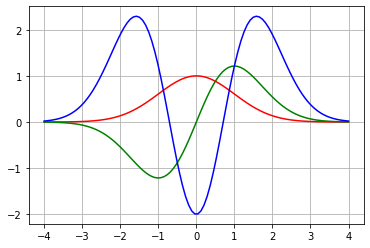

____Máscara gaussiana de orden 0___
Máscara Gaussiana


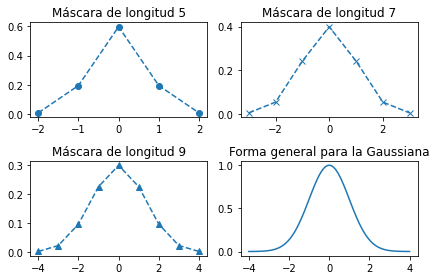

Comparativa con getDerivKernels


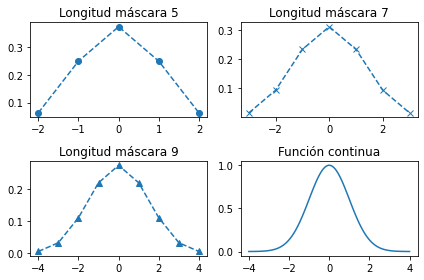

____Máscara gaussiana de orden 1___
Máscara Gaussiana primera derivada


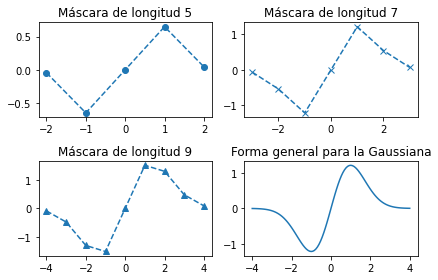

Comparativa con getDerivKernels


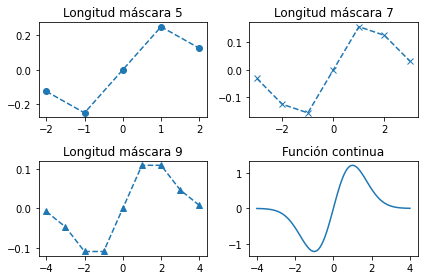

____Máscara gaussiana de orden 2___
Máscara Gaussiana segunda derivada


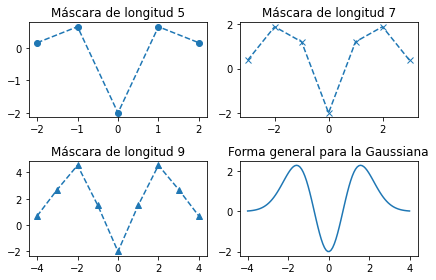

Comparativa con getDerivKernels


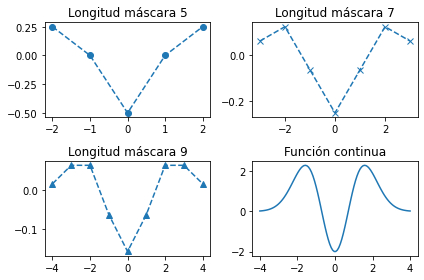

In [19]:
# Declaración de la Gaussiana y su derivada primera y segunda
def Gaussiana (x: float, desviacion_tipica : float):
    return np.exp( - x**2 /(2* desviacion_tipica**2))

def DerivadaPrimeraGaussiana (x: float, desviacion_tipica : float)->list:
    return Gaussiana (x, desviacion_tipica)* 2*x

def DerivadaSegundaGaussiana (x: float, desviacion_tipica : float)->list:
    return np.exp( - x**2 /(2* desviacion_tipica**2))* (4*x**2 -2)

# Representación 
# Rango de valores
inferior = -4
superior = 4
puntos = 100
colores=['r', 'g', 'b']
x_valores = np.linspace(inferior, superior, puntos)
FUNCIONES = [Gaussiana, DerivadaPrimeraGaussiana, DerivadaSegundaGaussiana]
# Relizamos los mapeos de los valores
sigma = 1.0

y_valores = list([f(x_valores, sigma) for f in FUNCIONES])
# Mostramos los valores usando matplotlib

# Mostramos Gráfico con las funciones que queremos discretizar
fig, ax = plt.subplots()
ax.grid(True, which='both')
list( map(lambda x: plt.plot(x_valores, x[0],x[1]), zip(y_valores, colores)))
plt.show()
    
# Declaración de las funciones para calcular la máscara de tamaño T

def Mascara( f, size:int ):
    ''' Función auxiliar que devuelve estrictamente la máscara
        Devuelve la máscara de f de tamaño size 
        Requisito: size debe ser impar. 
    '''
    k = (size -1)//2
    return [f(i) for i in range(-k,k+1)]

def MascaraGaussiana( desviacion_tipica:float, size:int)-> list:
    '''Máscara Gaussiana de tamaño "size"
    Requisito size debe ser impar 
    '''
    mascara_sin_normalizar = np.array(
        Mascara(lambda x: Gaussiana(x, desviacion_tipica), size),
        np.float64)
    suma = sum(mascara_sin_normalizar)
    return mascara_sin_normalizar/suma

def MascaraDerivadaPrimera(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaPrimeraGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

def MascaraDerivadaSegunda(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaSegundaGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar
MASKS_LIST = [MascaraGaussiana, MascaraDerivadaPrimera,MascaraDerivadaSegunda]
'''
La funciones creadas dependen de la desviación típica y del tamaño de la máscara. 
Con el fin de hacerlas menos restrictivas en virtud de la relación T = 2 ceil(3 sigma) +1, 
despejando T y sigma respectivamente obtenemos
'''
def DeductSizeTFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return int(2* np.ceil(3*sigma) + 1)

def DeductSizeKFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return np.ceil(3*sigma)

def DeductSigmaFromT( T: int) -> float: 
    '''Ojo: se supone que 3 sigma = ceil(3sigma) = (T-1)/2'''
    return (T-1)/6.0

##### Implementación de la función general   
def MascarasGaussianasGeneral(orden : int, sigma: float =None, T: int = None) ->np.array: 
    '''Devuelve máscara de orden \in {0,1,2}
        Proporcionando sigma o T como dato, en  caso de que uno de ellos no sea dado lo deduce por 
        la relación ya mencionado
    '''
    # comprobación de que se cumplen las hipótesis
    assert 0<= orden <= 2
    assert sigma != None or T != None
    # Deducción pertinentes si son necesarias
    if( T == None):
        T = DeductSizeTFromSigma(sigma)
    elif(sigma == None):
        sigma = DeductSigmaFromT(T)

    return MASKS_LIST[orden](sigma, T)

##### Función para comparar máscaras de forma visual 
def ComparaMascaras (listaMascaras,rangos, nombres):
    ''' Muestra en pantalla una imagen tras otra de las máscaras'''
    for i,m in enumerate(listaMascaras): 
        plt.plot(RangoK(rangos[i]), listaMascaras)
        plt.title(nombres[i])
    plt.show()


def MSE(A:np.array,B:np.array)-> float:
    return np.square(A-B).mean()

def ComparaMascarasAnalitico (m1:np.array, m2:np.array):
    mse_m1_con_m2 = MSE(m1, m2)
    sigma = DeductSigmaFromT(len(m1))
    gaussianaValores = [ Gaussiana(x, sigma) for x in RangoK((len(m1)-1)//2)]
    mse_m1_con_gaussiana = MSE(m1, gaussianaValores)
    mse_m2_con_gaussiana = MSE(m2, gaussianaValores)

    print(mse_m1_con_m2,  mse_m1_con_gaussiana, mse_m2_con_gaussiana)

    

#####  Test

lista_longitudes = [5,7,9]
colores = ['--o', '--x', '--^']
funciones = [
    {'funcion': MascaraGaussiana, 'nombre': 'Máscara Gaussiana', 'derivate order': 0},
    {'funcion': MascaraDerivadaPrimera, 'nombre': 'Máscara Gaussiana primera derivada', 'derivate order': 1},
    {'funcion': MascaraDerivadaSegunda, 'nombre': 'Máscara Gaussiana segunda derivada', 'derivate order': 2},
]
for j,f in enumerate(funciones):
    print(f'____Máscara gaussiana de orden {j}___')
    mascara=f['funcion'] 
    print(f['nombre'])
    fig, ax = plt.subplots(2,2)
    # Mis máscaras
    for i,l in enumerate(lista_longitudes):
        # Calculamos máscara
        a =  MascarasGaussianasGeneral(orden=j,T=l)
        # Creamos gráfico asociado
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'k={l//2}')
        ax[i//2, i%2].set_title(f'Máscara de longitud {l}')
    # Añadimos al gráfico gaussiana de orden j (la función continua)
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    plt.title('Forma general para la Gaussiana')
    fig.tight_layout()
    plt.show()
    # Máscara opencv
    print('Comparativa con getDerivKernels')
    fig, ax = plt.subplots(2,2)
    for i,l in enumerate(lista_longitudes):
        a = cv.getDerivKernels(j,1,ksize=l, normalize = True)[0]
        b = RangoK(l//2)
        ax[i//2, i%2].plot(b, a, colores[i], label=f'cv.getDerivKernels de longitud={l//2}')
        ax[i//2, i%2].set_title(f'Longitud máscara {l}')
    ax[1,1].plot(x_valores, y_valores[j])
    ax[1,1].set_title('Función continua')
    fig.tight_layout()
    plt.show()



# Ejercicio 1B
[DONE] Calcule las máscaras discretas 1D de longitud 5 y 7 tanto de alisamiento como de derivada de
primer orden generadas a partir de la aproximación binomial de la Gaussiana y la máscara de
derivada de longitud 3.  
[] Ejecute la función cv2.getDerivKernels(0,1,9).   
[] Observe los vectores de salida y compárelos con los previamena = cv.getDerivKernels(i,1,ksize=l, normalize = False)[0]te calculados, ¿Qué relación hay? ¿Qué conclusiones
extrae sobre la aproximación de OpenCV al cálculo de las máscaras de derivadas de primer
orden?

## Solución  

### Cáculo máscara de alisamiento  

Se parte de la primera binomial 
 1
121 

Para calcular la máscara de alisamiento de tamaño n se normalizará la fila correspondiente d

Podría haberse obtenido por inducción donde el binomio n-ésimo se calcula como $B_n = B_{N-1} * [1,1]$ y $B_1 = [1]$ (ver celda segunda de código, donde uno de los test para comprobar si la convolución 1D es correcta los calcula). Sin embargo, con el fin de hacer un cálculo más eficiente, se empleará un cálculo directo a través de los coeficientes binomiales. 

### Cálculo máscara de derivada de longitud 3  

Para obtenerla se derivarán usando convolución las máscaras de alisamiento anteriores, esto es convolucionando por $[1,0,-1]$. 

___1.2.1 Cáculo máscara de alisamemiento normalizadas__
Máscara alisamiento tamaño   5
[0.  0.6 1.  0.6 0. ]


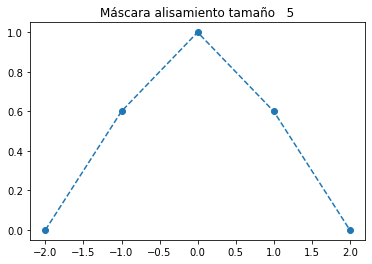

Máscara alisamiento tamaño   7
[0.         0.26315789 0.73684211 1.         0.73684211 0.26315789
 0.        ]


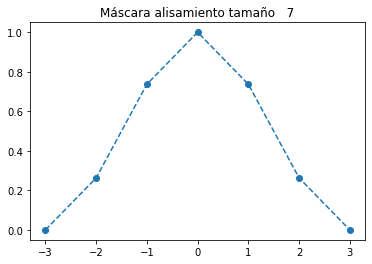


___1.2.1 Derivadas máscara de alisamemiento normalizadas__
La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud 5:
[ 0.  -0.6 -1.   0.   1.   0.6  0. ]


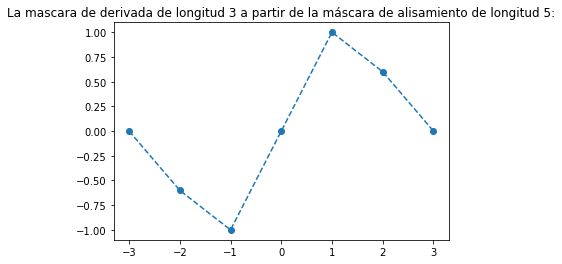

La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud 7:
[ 0.         -0.26315789 -0.73684211 -0.73684211  0.          0.73684211
  0.73684211  0.26315789  0.        ]


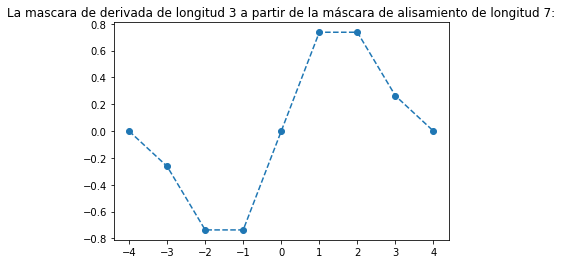

In [25]:
def MascaraBinomialSinNormalizar( longitud:int): 
    n = longitud -1
    return [scipy.special.binom(n, i)  for i in range(n+1)]
 
## Calculamos máscara de alisamiento normalizadas
print('___1.2.1 Cáculo máscara de alisamemiento normalizadas__')
LONGITUD = [5,7]
alisamiento = dict()
for l in LONGITUD: 
    alisamiento[l]= Normalize(MascaraBinomialSinNormalizar(l))
    titulo = f'Máscara alisamiento tamaño   {l}'
    print(titulo)
    print (alisamiento[l])
    MuestreaMascara(alisamiento[l], titulo)
    
## Máscara de derivada 
print('\n___1.2.1 Derivadas máscara de alisamemiento normalizadas__')
derivada = dict()
mascara_derivada = [-1, 0, 1] # máscara derivada longitud 3
for l in LONGITUD:
    derivada[l] = Convolution1D(alisamiento[l], mascara_derivada )
    titulo = f'La mascara de derivada de longitud 3 a partir de la máscara de alisamiento de longitud {l}:'
    print(titulo)
    print(derivada[l])
    MuestreaMascara(derivada[l], titulo)
    


Si tenemos en cuenta el apartado anterior, con un solo vistazo a las gráficas podemos pensar que 


(array([[ 1.],
       [ 8.],
       [28.],
       [56.],
       [70.],
       [56.],
       [28.],
       [ 8.],
       [ 1.]], dtype=float32), array([[ -1.],
       [ -6.],
       [-14.],
       [-14.],
       [  0.],
       [ 14.],
       [ 14.],
       [  6.],
       [  1.]], dtype=float32))


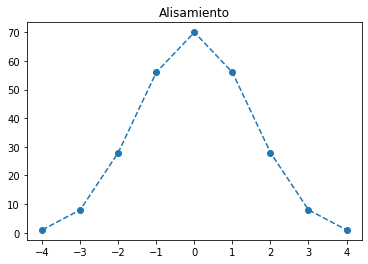

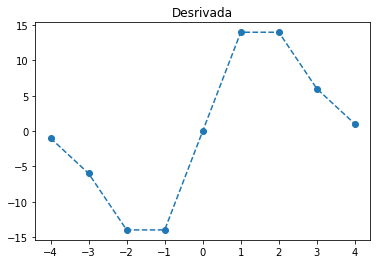

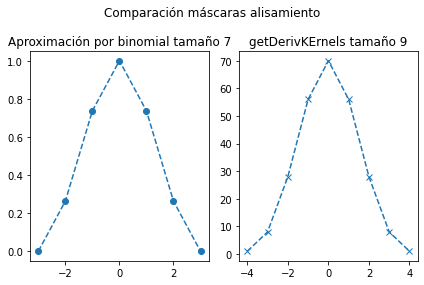

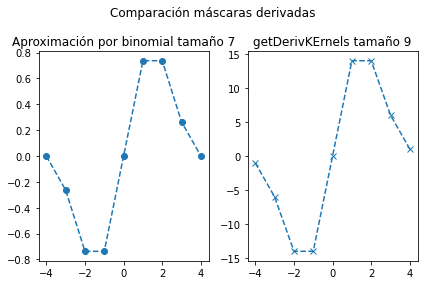

In [43]:
#1.B.2
mascara = cv.getDerivKernels(0,1,9)
print(mascara)
MuestreaMascara(mascara[0], 'Alisamiento')
MuestreaMascara(mascara[1], 'Desrivada')


MuestraDosMascaras(alisamiento[7], mascara[0], 
    'Comparación máscaras alisamiento',
    'Aproximación por binomial tamaño 7',
    'getDerivKErnels tamaño 9'
    )

MuestraDosMascaras(derivada[7], mascara[1], 
    'Comparación máscaras derivadas',
    'Aproximación por binomial tamaño 7',
    'getDerivKErnels tamaño 9'
    )

La gran similitud visual de las gráficas nos hace cuestionarnos el algoritmo de cálculo que emplea la biblioteca de open cv. 

Consultando la documentación oficial de `getDerivKernels()`
de opencv https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea a día 19 de octubre de 2021
, se nos indica que los kernel han sido generados de los Kernel de Sobel; éstos son construibles de manera recursiva como:
Sea $S_n$ la máscara de Sobel de tamaño $2*n+1$
$S_n = S_{n-1} * [1,2,1]$ con $S_0 = [1]$
Para la derivada $S_n' = S_n * [-1,0,1] = S_{n-1}' * [1,2,1]$ 

Si recordamos que la aproximación de la máscara gaussiana por la binomial se podía construir de manera recursiva como  $B_n = B_{N-1} * [1,1]$ y $B_1 = [1]$ 
y relacionamos que $[1,1]*[1,1] = [1,2,1]$ se concluye que $S_n = B_{2n}$ de ahí lo que apriori era similitud es ahora igualdad. 

In [62]:
print('Ejemplificamos el comentario anterios')
casos = 5
print( 'Cálculo por Sobel')
for i in range(3, 3+5*2,2):
    a,b = cv.getDerivKernels(0,1,i)
    print(a.T, b.T)

print('Construcción por recursividad')
a = [1,2,1]
b = [-1, 0, 1]
print(a,b)
for i in range(casos-1):
    a = Convolution1D(a,[1,2,1])
    b = Convolution1D(b,[1,2,1])
    print(f"S_{i+1} = {a}, S'_{i+1}= {b}")

a = [1,2,1]
b = [-1, 0, 1]
print(a,b)
for i in range(2*(casos-1)):
    a = Convolution1D(a,[1,1])
    b = Convolution1D(b,[1,1])
    print(f"B_{i+1} = {a}, B'_{i+1}= {b}")


Ejemplificamos el comentario anterios
Cálculo por Sobel
[[1. 2. 1.]] [[-1.  0.  1.]]
[[1. 4. 6. 4. 1.]] [[-1. -2.  0.  2.  1.]]
[[ 1.  6. 15. 20. 15.  6.  1.]] [[-1. -4. -5.  0.  5.  4.  1.]]
[[ 1.  8. 28. 56. 70. 56. 28.  8.  1.]] [[ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]]
[[  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.]] [[ -1.  -8. -27. -48. -42.   0.  42.  48.  27.   8.   1.]]
Construcción por recursividad
[1, 2, 1] [-1, 0, 1]
S_1 = [1. 4. 6. 4. 1.], S'_1= [-1. -2.  0.  2.  1.]
S_2 = [ 1.  6. 15. 20. 15.  6.  1.], S'_2= [-1. -4. -5.  0.  5.  4.  1.]
S_3 = [ 1.  8. 28. 56. 70. 56. 28.  8.  1.], S'_3= [ -1.  -6. -14. -14.   0.  14.  14.   6.   1.]
S_4 = [  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.], S'_4= [ -1.  -8. -27. -48. -42.   0.  42.  48.  27.   8.   1.]
[1, 2, 1] [-1, 0, 1]
B_1 = [1. 3. 3. 1.], B'_1= [-1. -1.  1.  1.]
B_2 = [1. 4. 6. 4. 1.], B'_2= [-1. -2.  0.  2.  1.]
B_3 = [ 1.  5. 10. 10.  5.  1.], B'_3= [-1. -3. -2.  2.  3.  1.]
B_4 = [ 1.  6. 15

C. 
[TEST] Implementar la convolución de una imagen con una máscara 2D de dimensiones inferior a la
imagen 
 - [DONE]suponiendo la propiedad de separabilidad de la máscara 
 - [DONE]e imponiendo bordes reflejados. 
 
 La entrada a la función serán las máscaras 1D descomposición de la máscara 2D.
Comparar su funcionamiento con: 

a.[] La salida de cv2.GaussianBlur para una máscara de entrada Gaussiana con iguales
parámetros en ambos casos. Mostrar ambos resultados.

b.[] Usar las máscaras del punto A para calcular la imágenes derivadas respecto de x e y
de una imagen dada. Mostrar los resultados.


## Sobre la implementación 
Se deberá tener en cuenta que es necesario: 
1. Ampliar bordes de la imagen en el tamaño correcto.
2. Que gestione de manera eficiente si la imagen está en color o escala de grises.

### Diseño del algoritmo
La función solución al problema es `ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT)` para su implementación se han implementado dos funciones auxiliares:   

- `Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array`: Realiza convolución de un array a una máscara sin añadir paddings.
- `ConvolveSeparableOneChannel(bordered_image, dx, dy):` Realiza la convolución 2D de un canal, está basada en la función anterior.  

### Recursos utilizados  
Para aumentar el borde se utilizará la función `copyMakeBorder` de open cv y además como criterio de creación de padding el argumento que reflecte el margen, este es `BORDER_REFLECT`; también de la biblioteca de open cv.   

Fuente:   
https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/

Además, para gestionar de un modo eficiente el tratamiento de una imagen a color hemos usado la funciones de cv `merge` y `split` que lo que hacen es unir canales o separarlos en distintos arrays respectivamente. 
Fuente: http://acodigo.blogspot.com/2018/01/opencv-uso-de-las-funciones-split-y.html

Implementación eficiente hecha por Mesejo

La primera como lo has hecho tú
Seguna opción: 

1. Se extiende kernel al resto de la imagen, de esta forma lo pilla todo. 

¿Cómo se calcula la expansión del kernel?
Convolve1D es el que hay que expandir.  

Comentar la diferencia entre correlación cruzada y convolución y que en nuestro caso da igual: nosotros lo haremos de manera purista (180 grados. )

In [ ]:
# Versión 1
# Convolución 1D
def Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array:
    ''' Convolution without adding padding'''
    dx = _dx[::-1]
    mask_len = len(dx)
    convolved = [ 
        np.dot( row[i:mask_len+i], dx)
        for i in range( len(row)-mask_len+1)
    ]
    return np.array(convolved)
    
# Implementación de convolución 2D en un canal
def ConvolveSeparableOneChannel(bordered_image, dx, dy):
    '''Suponemos imagen monobanda, 
        dx, dy máscaras en respectivos ejes en los que aplicar convolución 
    '''
    # convolve horizontal
    horizontal_convolved = np.array([Convolve1DNotExpansive(row, dx) for row in bordered_image])
    #convolve vertical  
    output = [Convolve1DNotExpansive(column, dy) for column in horizontal_convolved.T]
    return np.array(output).T

# # Implementación de convolución 2D para imagen genérica  
def ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT): 
    '''
    Recibe imagen realiza una convolución en 2D 
    '''
    # Calculamos el tamaño de los borderes
    x_padding = int( (len(dx) - 1) /2)
    y_padding =  int( (len(dy) - 1) /2)
    # padding order : top, bottom, left, right 
    bordered_image = cv.copyMakeBorder(image, y_padding, y_padding, x_padding, x_padding,  border_type)
    # controlamos que sea monobanda o tribanda, separando los canales
    if(IsGreyScale(image)):
        out_img = ConvolveSeparableOneChannel(bordered_image, dx, dy)
    else:
        #separamos canales
        channels = cv.split(bordered_image)
        out_img = cv.merge(
            [
                ConvolveSeparableOneChannel(one_channel_image, dx, dy)
                for one_channel_image in channels
            ]
        )
    return out_img


Convolve in row
Test 1, should give [-2]
[-2 -2 -2]
Test  ConvolveSeparableOneChannel
[[-1]]


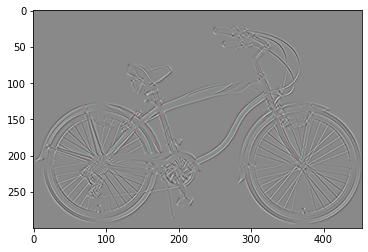

In [ ]:
## Test convolución 2D de un canal
if(TESTS_ON):
    input = np.array([
        [1,2,3],
        [4,5,6],
        [7,8,8]
    ])
    dx_long = [1,2,3,4,5]
    dx = [-1,0,1]
    dy = [-1,0,1]

    print('Convolve in row')
    print('Test 1, should give [-2]')
    test_1 = Convolve1DNotExpansive(dx_long, dx)
    print(test_1)


    print('Test  ConvolveSeparableOneChannel')
    test1 = ConvolveSeparableOneChannel(input, dx, dy)
    print(test1)

    bordered_img = ConvolveSeparable(img_bicycle, dx, dy)

    PrintOneImage(bordered_img)


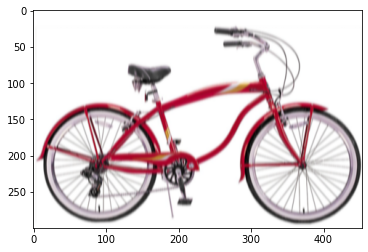

In [ ]:
# 1C Gaussian Blur
# Documentación: https://docs.opencv.org/4.5.3/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html

dst = cv.GaussianBlur( img_bicycle, (1,9), 0)
PrintOneImage(dst)


# Ejercicio 1D   


[]Usar las implementaciones del punto A para calcular máscaras normalizadas de la Laplaciana
de una Gaussiana.

 Mostrar ejemplos de funcionamiento usando bordes reflejados y dos
valores de sigma (1 y 3) con alguna imagen. Compare los resultados con la salida dada por
OpenCV con la función Laplaciana. 

[]Discuta pros y contras.


### Comentarios de Mesejo
Si rango de la matriz 1 entonces separable, en caso contrario no

Qué es la log y cómo se utiliza y mirar la diapositiva

## Solución 

Partimos del desarrollo matemático (operador laplaciano + propiedad asociativa y distributiva de la laplaciana)

Se llega a que la Laplaciana de una Gaussiana es  (fórmula). 

La derivada parcial será 

$$\frac{\partial G(x,y)}{\partial x} = G^'_$$

## Calcular la máscara discretizada  

Eso se hará gracias al ejercicio 1A

Como además no se nos ha provisto del tamaño de la máscara, este será deducido de la regla comentada en el apartado 1A 

El tamaño del array unidimensional de nuestra máscara es $T = 2 \lceil3 \sigma \rceil + 1$ calculado a traves de la función `DeductSizeFromSigma`

Kernels 1D
Máscara Gaussiana [0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]


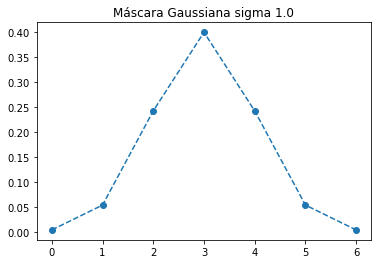

Mascara de la seguna gaussiana [ 0.37770588  1.89469397  1.21306132 -2.          1.21306132  1.89469397
  0.37770588]


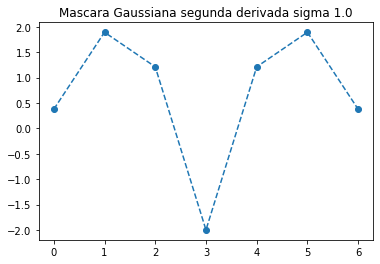

Máscara 2D asociada


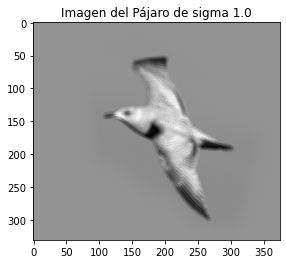

Kernels 1D
Máscara Gaussiana [0.00147945 0.00380424 0.00875346 0.01802341 0.03320773 0.05475029
 0.08077532 0.106639   0.12597909 0.133176   0.12597909 0.106639
 0.08077532 0.05475029 0.03320773 0.01802341 0.00875346 0.00380424
 0.00147945]


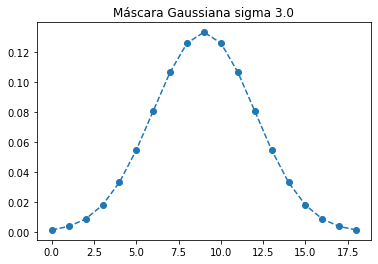

Mascara de la seguna gaussiana [ 3.57709689  7.2556372  12.75133455 19.21761022 24.43651646 25.48896201
 20.62204243 11.21032364  1.89191894 -2.          1.89191894 11.21032364
 20.62204243 25.48896201 24.43651646 19.21761022 12.75133455  7.2556372
  3.57709689]


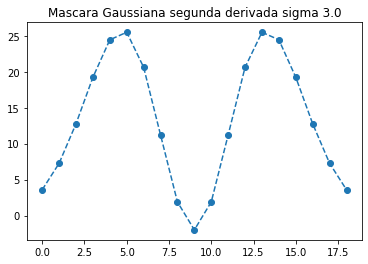

Máscara 2D asociada


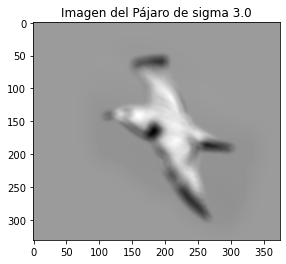

In [ ]:
# Ejercicio 1D

# assets 

def DeductSizeTFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return int(2* np.ceil(3*sigma) + 1)

def DeductSizeKFromSigma(sigma:float)-> int:
    ''' Calcula tamaño de másacara a partir de sigma'''
    return np.ceil(3*sigma)

#TODO calcular que el tamaño de la máscara coincide con e de T 

def SeparableMaskToOne(f:np.array,g:np.array)-> np.array :
    return np.dot(g.T, f)

## Solution 
SIZE = 3 # El tamaño debe de ser calculado a partir de la relación con los sigmas 
sigma = 1.0

def LaplacianOfGaussian(img, sigma:float, size: int):
    ''' Calcula el laplaciano de una gaussiana para una imagen img de sigam sigma'''
    mascara_gaussiana = MascaraGaussiana(sigma, size)
    mascara_segunda_derivada = MascaraDerivadaSegunda(sigma, size)

    dxx = ConvolveSeparable(img, mascara_segunda_derivada, mascara_gaussiana)
    dyy = ConvolveSeparable(img, mascara_gaussiana, mascara_segunda_derivada)

    imagen_resultante = sigma**2 * (dxx + dyy)
    return imagen_resultante

def Info( sigma, size): 
    # Mostramos las máscaras calculadas
    print( 'Kernels 1D')
    mascara_gaussiana = MascaraGaussiana(sigma, size)
    mascara_segunda_derivada = MascaraDerivadaSegunda(sigma, size)
    print('Máscara Gaussiana', mascara_gaussiana)
    MuestreaMascara(mascara_gaussiana, f'Máscara Gaussiana sigma {sigma}')
    print('Mascara de la seguna gaussiana', mascara_segunda_derivada)
    MuestreaMascara(mascara_segunda_derivada, f'Mascara Gaussiana segunda derivada sigma {sigma}')
    print('Máscara 2D asociada')
    # TODO Calcular máscara 2D asociada 
    mascara2D = SeparableMaskToOne(mascara_gaussiana, mascara_segunda_derivada)

## Resolución del ejercicio 
SIGMAS = [1.0, 3.0]
IMAGENES = [img_bird_grey]
TITULOS_IMAGENES = ['Pájaro']
for sigma in SIGMAS:
    size = DeductSizeTFromSigma(sigma)
    for i, imagen in enumerate(IMAGENES):
        titulo = f'Imagen del {TITULOS_IMAGENES[i]} de sigma {sigma}'
        # Información adicional sobre los cálculos y resultados
        Info(sigma, size)
        # Cálculo de la Gaussiana
        imagen_resultante = LaplacianOfGaussian(imagen, sigma, size)
        PrintOneImage(imagen_resultante, title= titulo)

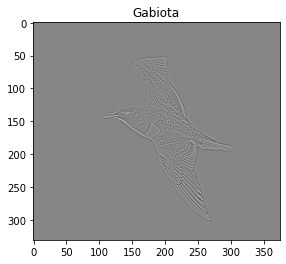

In [ ]:
# Open CV comparation
# Source: https://docs.opencv.org/4.5.3/d5/db5/tutorial_laplace_operator.html

# Declare the variables we are going to use
ddepth = cv.CV_16S  # What is this
kernel_size = 3
dst = cv.Laplacian( img_bird, ddepth, kernel_size)
PrintOneImage(dst, 'Gabiota')

# Conclusiones   

¿Por qué una sale más borrosa que otra? ¿Qué ventajas ofrece una frente a otra?


# TODO dibuja en 3D
# Fuente: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

False